<a href="https://colab.research.google.com/github/euviniciusmendonca/estudo_python/blob/main/Estat%C3%ADstica_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Após a década de 80 e 90, período no qual houveram diversos avanços tecnológicos e uma maior integração entre os mercados de diferentes países, o estudo e aplicação de técnicas no mercado financeiro se tornou ainda mais evidente. 

Neste quesito, utilizar técnicas matemáticas e estatísticas para entender o comportamento do mercado se tornou algo muito comum após o o banco
JP Morgan divulgou seu serviço RiskMetrics divulgar o VaR (Value at Risk) que consiste em uma métrica, utilizando estatística, para estimar o máximo de valor que seu ativo poderá perder em um único dia. 


Neste contexto, iremos analisar os dados de ação da BOVESPA, a bolsa de valores do Brasil com índices diários dos últimos 3 anos. Com estes dados e seguindo o passo a passo das perguntas abaixo, iremos calcular a maior perda esperada para o meu ativo no dia posterior.

Primeiro, para fazer o download dos dados, utilize o código abaixo para gerar o dataset:


```python

!pip install yfinance -q

#-- Importação de bibliotecas e dados
import pandas as pd
import yfinance as yf

msft = yf.Ticker("BOVA11.SA")

#-- Dataset Histórico
hist = msft.history(interval='1d', start='2019-01-01', end='2022-07-28')
hist['Date'] = pd.to_datetime(hist.index)
hist['dif'] = hist['Close'] - hist['Open']
```
**Note que o hist é um objeto DATAFRAME do PANDAS e a coluna dif é a perda ou ganho de valor que o ativo sofreu no dia**

Pensando em aplicar os conceitos de estatística vistos em aula, responda as perguntas a seguir:
* 1 - Calcule média, desvio padrão, e a moda da coluna dif?
* 2 - Construa um gráfico de boxplot e responda, qual é (aproximadamente) o valor do outlier mais distante?
* 3 - Calcule a maior amplitude do dia (High - Low), qual seria a média e variância dessa amplitude para os dados?
* 4 - Utilizando a coluna de data (agrupando por mês e ano) e o dif, qual foi o período com maior saldo negativo? (Entende-se por saldo negativo as somas das diferenças diárias)
* 5 - Calcule os valores de dif do 1,2,3 quartil e os percentis de 25,50 e 75. Compare os resultados o que tem de comum entre eles? 
* 6 - Construa um histograma das diferenças diárias e insira no mesmo gráfico uma linha informando a média e os valores distantes a 1 e 2 desvios padrõe.
* 7 - Faça um gráfico com os dados de Janeiro à Março de 2022 usando a coluna High e Close. Quantos dias nesse período o ativo fechou com o valor próximo do em do High (Considere até uma diferença de 0.1 próximo). Calcule esses dias e veja se está parecido com o número que chegou ao analisar o gráfico?
* 8 - Crie uma coluna que represente o mês dos dados. Em seguida, crie um histograma para cada Mês.
* 9 - Um variável descritiva comumente utilizada nas análises é a Assimetria. Com ela podemos saber se temos valores que deixam a Moda, Mediana e Média muito distantes entre sí. Utilizando a questão anterior e analisando a curva, ela aparenta ter qual assimetria?


![img](https://image.slidesharecdn.com/aula20-medidasdeassimetria-121028121407-phpapp01/95/aula-20-medidas-de-assimetria-4-638.jpg?cb=1351426557)


* 10 - Agora, utilizando o conceito acima e as fórmulas mostradas na figura abaixo, vamos calcular para saber se de fato essa distribução é simétrica. Calcule utilizando as duas formas e perceba que os va


![img](https://slideplayer.com.br/slide/10792951/38/images/10/Coeficiente+de+Assimetria+%28As%29.jpg)



## 0 - Importaçao dos dados/ Bibliotecas

In [ ]:
!pip install yfinance -q

#-- Importação de bibliotecas e dados
import pandas as pd
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

msft = yf.Ticker("BOVA11.SA")

#-- Dataset Histórico
hist = msft.history(interval='1d', start='2019-01-01', end='2022-07-28')
hist['Date'] = pd.to_datetime(hist.index)
hist['dif'] = hist['Close'] - hist['Open']
display(hist.head())
display(hist.tail())

     |████████████████████████████████| 62 kB 749 kB/s 


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,dif
Date,,,,,,,,,
2019-01-02,84.599998,88.260002,84.349998,87.900002,5021260,0,0,2019-01-02,3.300003
2019-01-03,87.550003,88.400002,86.800003,88.000000,4300220,0,0,2019-01-03,0.449997
2019-01-04,88.199997,89.449997,87.629997,88.500000,2449750,0,0,2019-01-04,0.300003
2019-01-07,88.650002,89.320000,88.059998,88.480003,2891360,0,0,2019-01-07,-0.169998
2019-01-08,88.750000,88.970001,87.870003,88.830002,3441770,0,0,2019-01-08,0.080002


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,dif
Date,,,,,,,,,
2022-07-21,93.989998,95.529999,93.620003,95.349998,7765854,0,0,2022-07-21,1.360001
2022-07-22,95.790001,96.160004,94.820000,95.419998,5037163,0,0,2022-07-22,-0.370003
2022-07-25,96.309998,96.930000,96.029999,96.750000,4192244,0,0,2022-07-25,0.440002
2022-07-26,96.879997,97.160004,95.849998,96.150002,4780077,0,0,2022-07-26,-0.729996
2022-07-27,96.769997,97.940002,96.459999,97.830002,4846166,0,0,2022-07-27,1.060005


## 1 - Calcule média, desvio padrão, e a moda da coluna dif?

In [ ]:
#-- Média
hist['dif'].mean()

-0.07477434386518148

In [ ]:
#-- Desvio Padrão
hist['dif'].std()

1.1631112620322424

In [ ]:
#-- Moda = 0 -> Estabilidade do ativo
hist['dif'].value_counts()

 0.000000    26
 0.500000     6
 1.029999     6
-0.110001     6
 0.209999     5
             ..
-1.280006     1
-1.160004     1
 1.409996     1
 1.820000     1
 1.060005     1
Name: dif, Length: 495, dtype: int64

## 2 - Construa um gráfico de boxplot do dif e responda, qual é (aproximadamente) o valor do outlier mais distante?

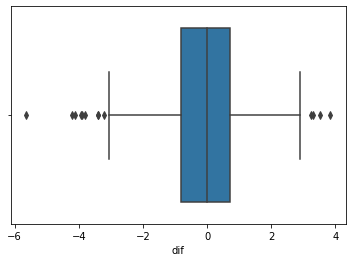

In [ ]:
#-- Aproximadamente -6
sns.boxplot(data=hist,x='dif')

## 3 - Calcule a maior amplitude do dia (High - Low), qual seria a média e variância dessa amplitude para os dados?

In [ ]:
hist['Amp'] = hist['High'] - hist['Low'] 
print(f"Média Amp: {hist['Amp'].mean()} \nVariância: {hist['Amp'].std()**2}")

Média Amp: 1.7868285512816555 
Variância: 1.016513049491413


## 4 - Utilizando a coluna de data (agrupando por mês e ano) e o dif, qual foi o período com maior saldo negativo? (Entende-se por saldo negativo as somas das diferenças diárias)

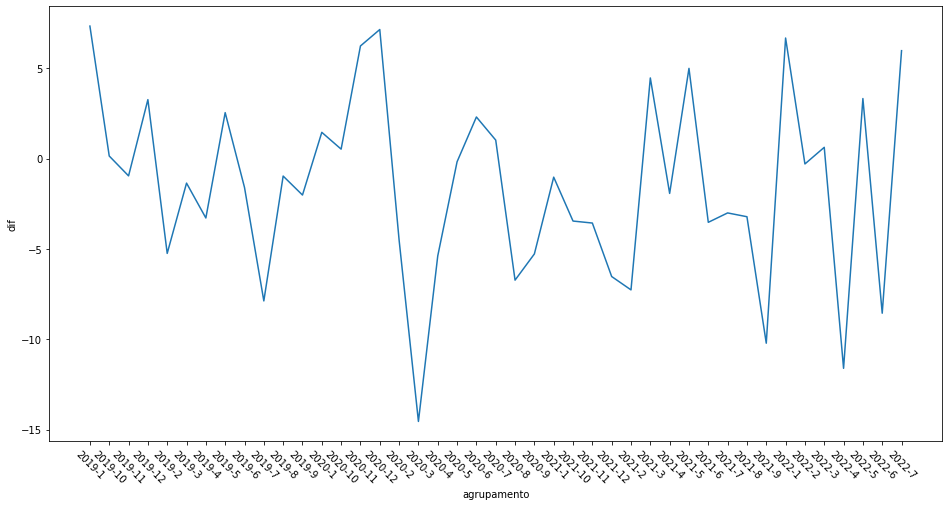

In [ ]:
#-- Resp: 2022-6 perda total de -8.55999
hist['agrupamento'] = hist['Date'].dt.year.astype(str)  + '-' + hist['Date'].dt.month.astype(str)
plt.figure(figsize=(16,8))
sns.lineplot(data=hist.groupby('agrupamento',as_index=False).sum(), x = 'agrupamento', y='dif')
plt.xticks(rotation=-45)
plt.show()

In [ ]:
hist.groupby('agrupamento',as_index=False).sum().sort_values('dif').head(1)

,agrupamento,Open,High,Low,Close,Volume,Dividends,Stock Splits,dif,Amp
17,2020-3,1739.119995,1784.439995,1665.73999,1724.569992,479503470,0,0,-14.550003,118.700005


## 5 - Calcule os valores de dif do 1,2,3 quartil e os percentis de 25,50 e 75. Compare os resultados o que tem de comum entre eles?

In [ ]:
hist['dif'].describe()

count    886.000000
mean      -0.074774
std        1.163111
min       -5.650002
25%       -0.809998
50%        0.000000
75%        0.700003
max        3.840004
Name: dif, dtype: float64

In [ ]:
# Os resultados são os mesmos:
# Quartil 1 = Percentil 25
# Quartil 2 = Percentil 50
# Quartil 3 = Percentil 75
print(f"Percentil de 25: {hist['dif'].quantile(0.25)} ")
print(f"Percentil de 50: {hist['dif'].quantile(0.50)} ")
print(f"Percentil de 75: {hist['dif'].quantile(0.75)} ")

Percentil de 25: -0.80999755859375 
Percentil de 50: 0.0 
Percentil de 75: 0.7000026702880859 


## 6 - Construa um histograma das diferenças diárias e insira no mesmo gráfico uma linha informando a média e os valores distantes a 1 e 2 desvios padrõe.

<Figure size 1224x360 with 0 Axes>

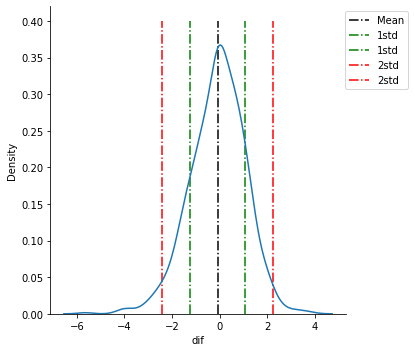

In [ ]:
plt.figure(figsize=(17,5))
sns.displot(data=hist,x='dif', kind='kde')
plt.vlines(x = hist['dif'].mean(), ymin = 0, ymax = 0.4, colors='k', linestyles='dashdot', label='Mean')
plt.vlines(x = hist['dif'].mean()+hist['dif'].std(), ymin = 0, ymax = 0.4, colors='g', linestyles='dashdot', label='1std')
plt.vlines(x = hist['dif'].mean()-hist['dif'].std(), ymin = 0, ymax = 0.4, colors='g', linestyles='dashdot', label='1std')
plt.vlines(x = hist['dif'].mean()+2*hist['dif'].std(), ymin = 0, ymax = 0.4, colors='r', linestyles='dashdot', label='2std')
plt.vlines(x = hist['dif'].mean()-2*hist['dif'].std(), ymin = 0, ymax = 0.4, colors='r', linestyles='dashdot', label='2std')
plt.legend(bbox_to_anchor=(1.23,1))
plt.show()

## 7 - Faça um gráfico com os dados de Janeiro à Março de 2022 usando a coluna High e Close. Quantos dias nesse período o ativo fechou com o valor próximo do High (Considere até uma diferença de 0.1 próximo). Calcule esses dias e veja se está parecido com o número que chegou ao analisar o gráfico?

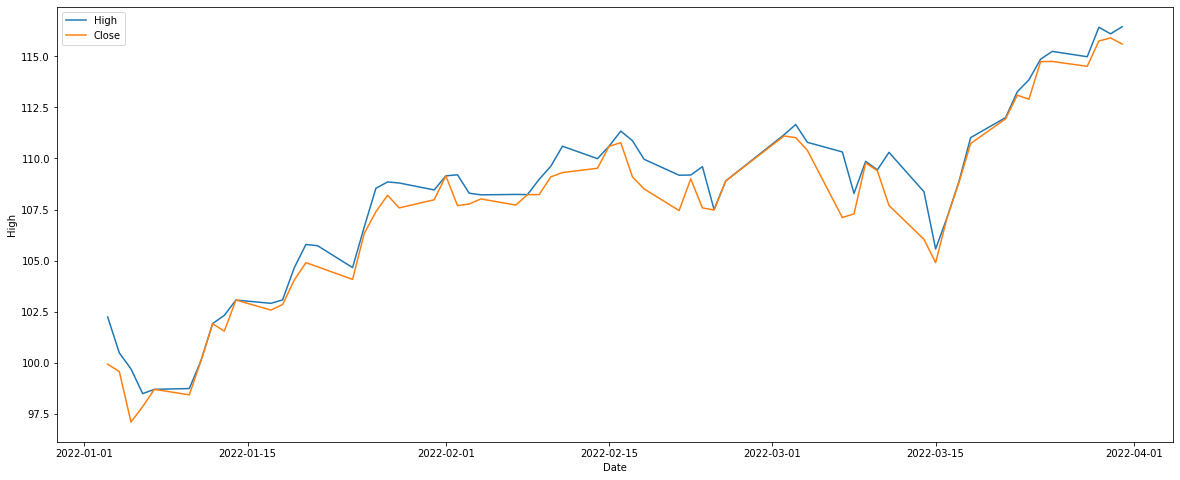

In [ ]:
plt.figure(figsize=(20,8))
hist_3m = hist[(hist['Date'] >= '2022-01-01') & (hist['Date'] <= '2022-03-31')]
sns.lineplot(data=hist_3m,x='Date',y='High', label='High')
sns.lineplot(data=hist_3m,x='Date',y='Close', label='Close')
plt.legend()
plt.show()

In [ ]:
hist_3m[abs(hist_3m['High'] - hist_3m['Close']) <= 0.1].shape[0]

15

## 8 - Crie uma coluna que represente o mês dos dados. Em seguida, crie um histograma para cada Mês.

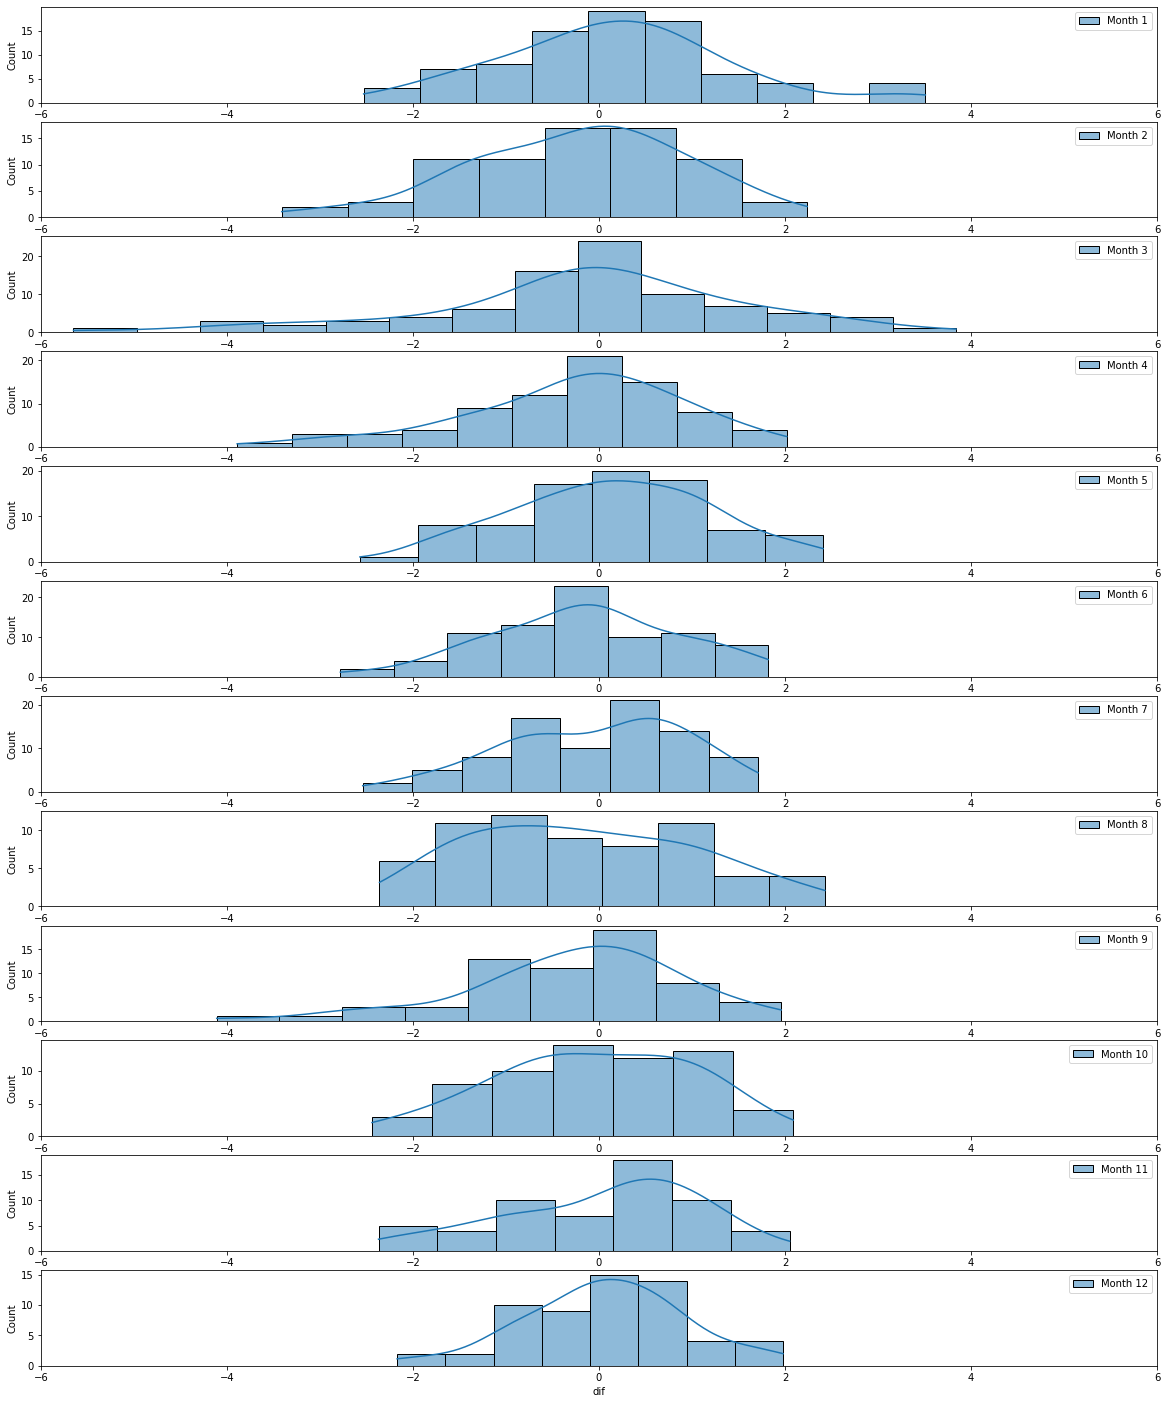

In [ ]:
plt.figure(figsize=(20,25))
hist['Month'] = hist['Date'].dt.month
for i in range(1,12 + 1):
  plt.subplot(12,1,i)
  sns.histplot(data=hist[hist['Month'] == i],x='dif',label=f'Month {i}', kde=True)
  plt.xlim([-6,6])
  plt.legend()


## 9 - Um variável descritiva comumente utilizada nas análises é a Assimetria. Com ela podemos saber se temos valores que deixam a Moda, Mediana e Média muito distantes entre sí. Utilizando a questão anterior e analisando a curva, ela aparenta ter qual assimetria?


![img](https://image.slidesharecdn.com/aula20-medidasdeassimetria-121028121407-phpapp01/95/aula-20-medidas-de-assimetria-4-638.jpg?cb=1351426557)

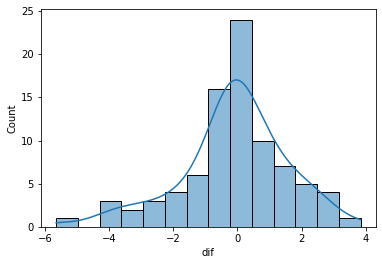

In [ ]:
sns.histplot(hist[hist['Month'] == 3]['dif'], kde= True)

Analisando a figura, mesmo com a calda mais alongada, a distribuição parece simétrica

## 10 - Agora, utilizando o conceito acima e as fórmulas mostradas na figura abaixo, vamos calcular para saber se de fato essa distribução é simétrica. Calcule utilizando as duas formas e perceba que os va


![img](https://slideplayer.com.br/slide/10792951/38/images/10/Coeficiente+de+Assimetria+%28As%29.jpg)

In [ ]:
teste = hist[hist['Month'] == 3]['dif']
media = teste.mean()
moda = teste.value_counts().index[0]
s = teste.std()


As = (media - moda)/s
As

-0.07536122674779037

In [ ]:
Q1 = teste.quantile(0.25) 
Q3 = teste.quantile(0.75)
median = teste.median()

As = 3*(media - median)/s
As

-0.22608368024337114

Mesmo dando resultados diferentes, que depende das informações esatatísticas disponíveis podemos ver que o coeficiente de Assimetria As é muito próximo de 0, logo uma curva simétrica. Se formos levar ao pé do número, o valor é negativa, indicando uma calda mais alongada para a esquerda conforme o gráfico da questão acima sugere.